In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [179]:
df=pd.read_csv(r"C:\Users\dtdee\OneDrive\Desktop\Letsupgrade_Python\Data_Analysis_Visualisation\zomato_dataset_Analysis.csv")

In [180]:
df.shape

(9551, 21)

In [181]:
# Now if we want to see the entire rows and columns then we have the set-option function in the pandas

pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1])

In [182]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [183]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [184]:
# Adjusting the columns for the final Y values or dependent variable to be at last of the column

df=df[['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color',
       'Votes', 'Rating text']]

In [185]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,591,Excellent


In [186]:
#Checking the no of classes in the target variables 6 classes


df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [188]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Votes                   0
Rating text             0
dtype: int64

In [189]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                                                                     936
North Indian, Chinese                                                                            511
Chinese                                                                                          354
Fast Food                                                                                        354
North Indian, Mughlai                                                                            334
Cafe                                                                                             299
Bakery                                                                                           218
North Indian, Mughlai, Chinese                                                                   197
Bakery, Desserts                                                                                 170
Street Food                                                                       

In [190]:
df['Cuisines'].fillna('Biryani, North Indian, Mughlai',inplace=True)

In [191]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Votes                   0
Rating text             0
dtype: int64

In [192]:
df.duplicated().sum()

0

## How many Resturants are delivering foods online and offline

In [193]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [194]:
df['Has Online delivery'].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

<Axes: xlabel='Has Online delivery', ylabel='count'>

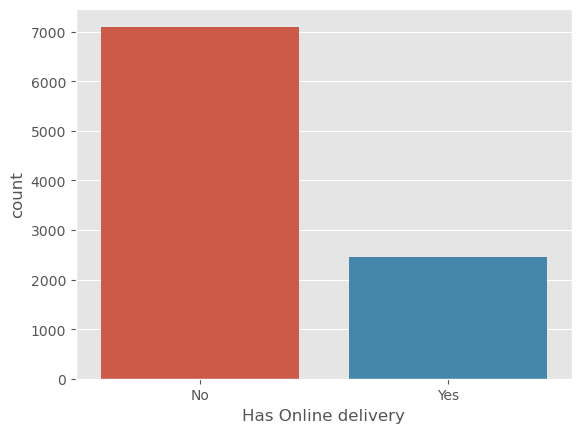

In [195]:
sns.countplot(x=df['Has Online delivery'])

## How many Resturants have excellent rating with differenet currencies

In [196]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [197]:
df[(df['Currency']=='Dollar($)') & (df['Rating text']=='Excellent')].shape

(69, 21)

<Axes: xlabel='Currency', ylabel='count'>

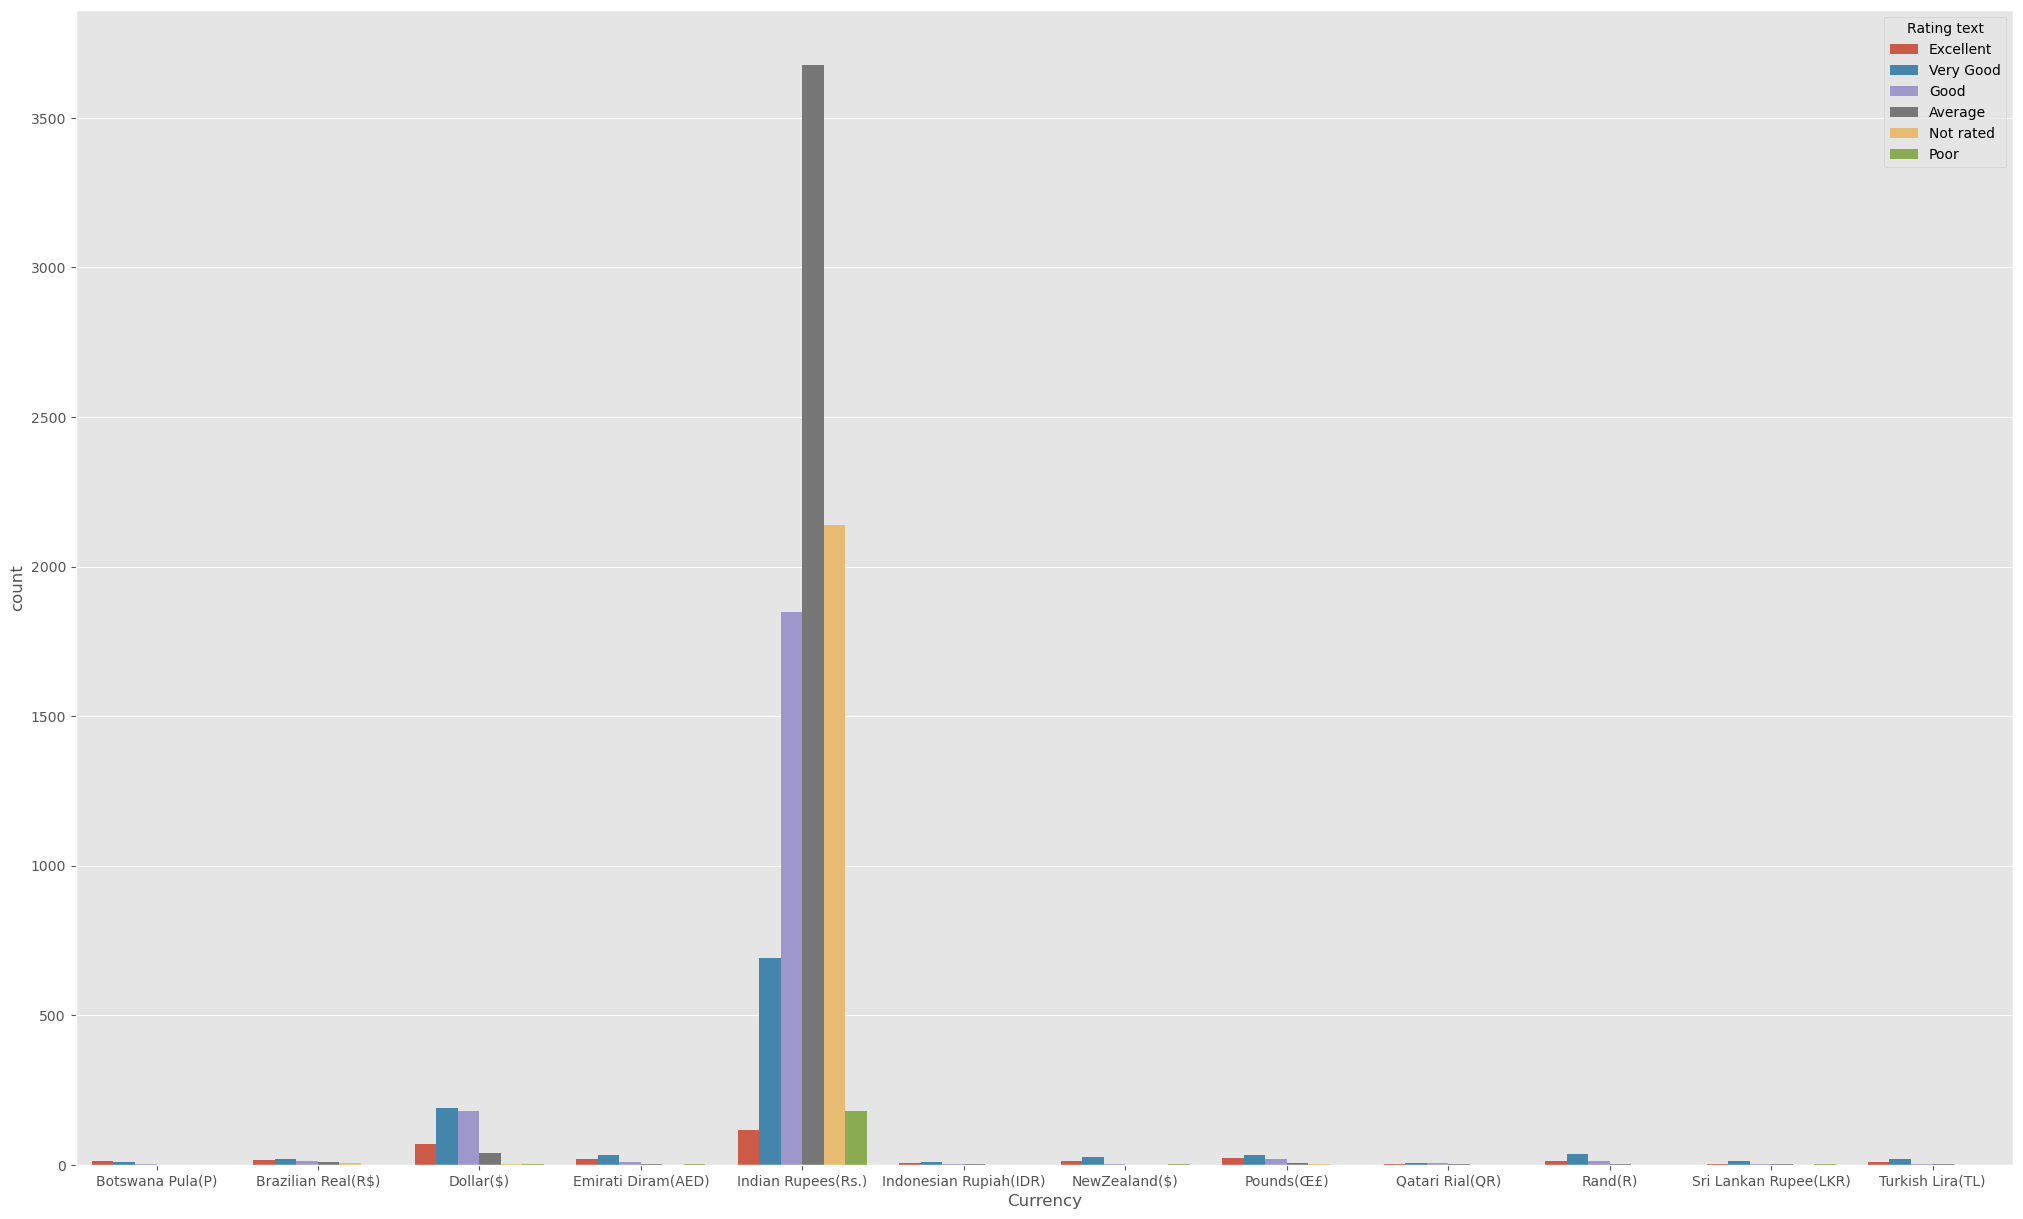

In [198]:
plt.figure(figsize=(25,15))
sns.countplot(x=df['Currency'],hue=df['Rating text'],data=df)

## Plot the City Hyderabad Ratings of the given Dataset

In [199]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [200]:
df[df['City']=='Hyderabad'].groupby('Rating text').count()['City']

Rating text
Excellent     6
Good          2
Very Good    10
Name: City, dtype: int64

<Axes: xlabel='Rating text'>

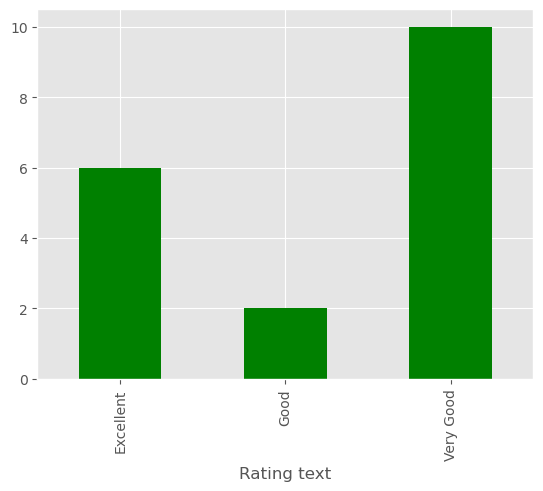

In [201]:
df[df['City']=='Hyderabad'].groupby('Rating text').count()['City'].plot(kind='bar',color='Green')

#### Q1: From which Locality maximum hotels are listed in Zomato

In [202]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [203]:
df.groupby('Locality').count()['Restaurant ID'].sort_values(ascending=False)[0:10]

Locality
Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Malviya Nagar           85
Pitampura               85
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Name: Restaurant ID, dtype: int64

<Axes: xlabel='Locality'>

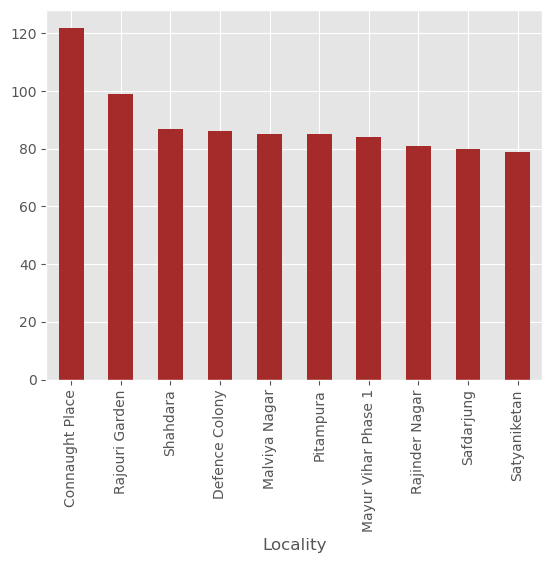

In [204]:
df.groupby('Locality').count()['Restaurant ID'].sort_values(ascending=False)[0:10].plot(kind='bar',color='Brown')

#### Q2: What kind of Cuisine do these highly-rated restaurants offer

In [205]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [206]:
np.sort(df['Aggregate rating'].unique())

array([0. , 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
       3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [207]:
#df[(df['Rating text']=='Excellent') | (df['Rating text']=='Very Good')][['Cuisines']]

In [208]:
df[(df['Rating text']=='Excellent') | (df['Rating text']=='Very Good')].shape

(1380, 21)

#### Q3: How many of such restaurants in Delhi accept online delivery

In [209]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [210]:
Z=df[((df['City']=='New Delhi')|(df['City']=='Hyderabad') ) & (df['Has Online delivery']=='Yes')]

<Axes: xlabel='City', ylabel='count'>

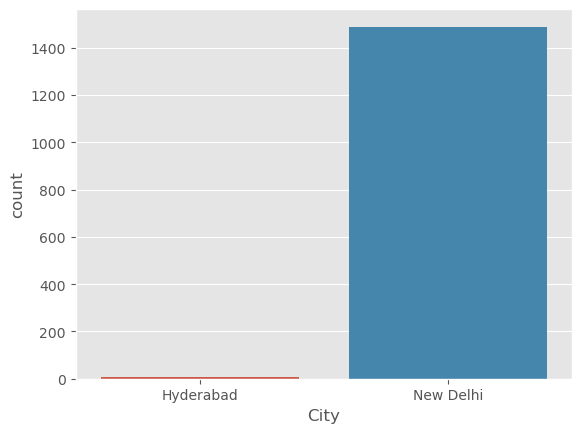

In [211]:
sns.countplot(x='City',data=Z)

### Q4: Understanding the Restaurants Aggregate rating with their Rating color.

In [212]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [213]:
M=df.groupby('Rating color').sum()['Aggregate rating']
M

Rating color
Dark Green     1402.6
Green          4497.4
Orange        11403.9
Red             427.4
White             0.0
Yellow         7735.2
Name: Aggregate rating, dtype: float64

<Axes: xlabel='Rating color'>

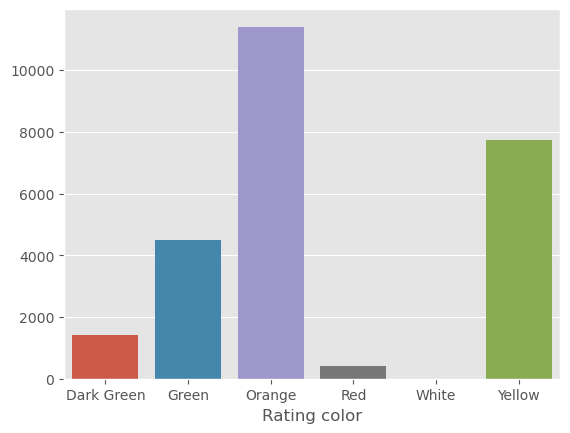

In [214]:
sns.barplot(x=M.index,y=M.values)

#### Q5: Find out percentage of data comprises to each city in India dataset

In [215]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


<Axes: ylabel='Restaurant ID'>

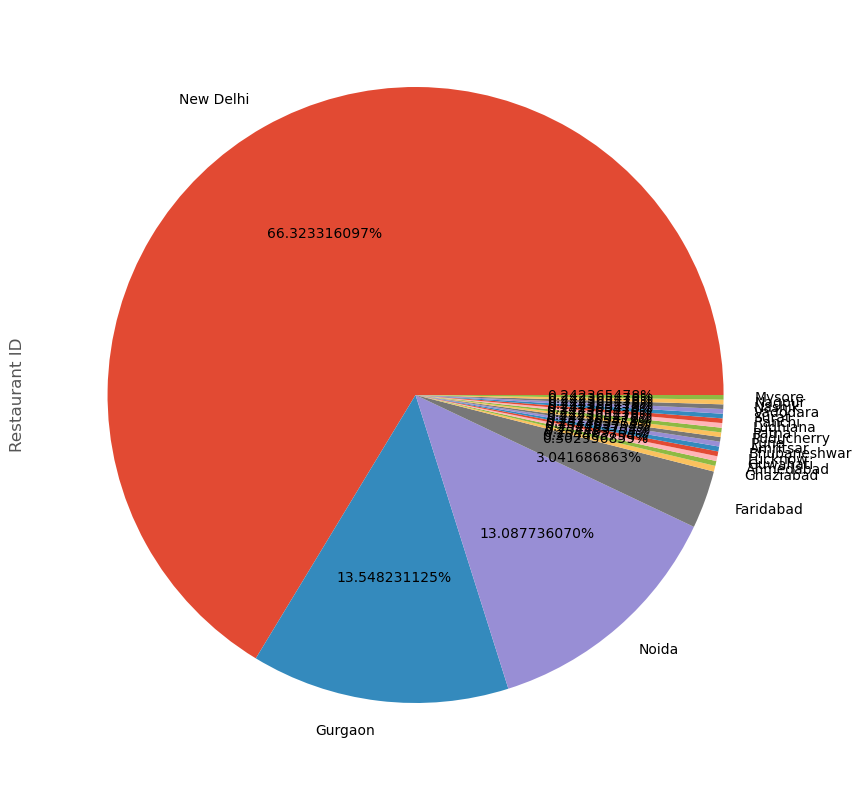

In [216]:
plt.figure(figsize=(15,10))

df[df['Country Code']==1].groupby('City').count()['Restaurant ID'].sort_values(ascending=False)[0:20].plot(kind='pie',autopct='%0.9f%%')

#### Q6:Find out number of restaurant registered on Zomato across all countries

In [217]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [218]:
df.groupby('Country Code').count()['City']

Country Code
1      8652
14       24
30       60
37        4
94       21
148      40
162      22
166      20
184      20
189      60
191      20
208      34
214      60
215      80
216     434
Name: City, dtype: int64

<Axes: xlabel='Country Code', ylabel='count'>

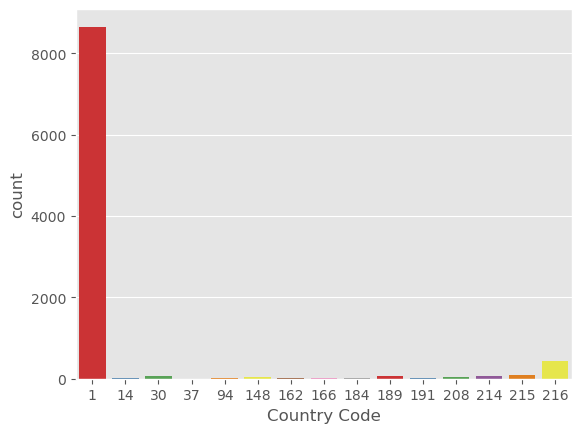

In [219]:
sns.countplot(x='Country Code',data=df,palette='Set1')

#### Q7:How people have rated the "Well known famous Coffee Brands" in New Delhi.


In [220]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [221]:
p=df[df['City']=='New Delhi'].groupby('Rating text').sum()['Votes']
p

Rating text
Average      117146
Excellent     25034
Good         283651
Not rated      1250
Poor           7243
Very Good    194016
Name: Votes, dtype: int64

<Axes: xlabel='Rating text'>

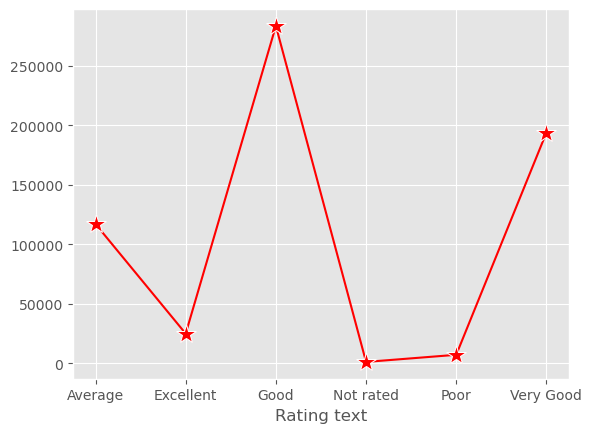

In [222]:
sns.lineplot(x=p.index,y=p.values,data=p,marker='*',ms=15, color='Red')

# Which coffee shop is rated highest by customers?


In [223]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent


In [224]:
df.groupby('Rating text').sum()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes
Rating text,,,,,,,,,,,,,,,,,,,,
Average,22888298028,Chez MichouPizza íæ BessaSushi LokoRoveretoMan...,13166,Brasí_liaBrasí_liaBrasí_liaBrasí_liaBrasí_liaB...,"SCLN, 208, Bloco A, Loja 30, Asa Norte, Brasí_...",Asa NorteAsa SulAsa Sulíguas ClarasPontí£o La...,"Asa Norte, Brasí_liaAsa Sul, Brasí_liaAsa Sul,...",275354.369066,102928.022196,"Fast Food, FrenchPizzaJapanesePizzaSeafoodItal...",2123845,Brazilian Real(R$)Brazilian Real(R$)Brazilian ...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,6091,11403.9,OrangeOrangeOrangeOrangeOrangeOrangeOrangeOran...,180307
Excellent,3025256003,Le Petit SouffleIzakaya KikufujiOomaSambo Koji...,33867,Makati CityMakati CityMandaluyong CityMandaluy...,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati CityLittl...","Century City Mall, Poblacion, Makati City, Mak...",7875.689478,5844.178752,"French, Japanese, DessertsJapaneseJapanese, Su...",2449120,Botswana Pula(P)Botswana Pula(P)Botswana Pula(...,YesYesNoYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,844,1402.6,Dark GreenDark GreenDark GreenDark GreenDark G...,256383
Good,15949089245,Cafe ArabelleCafí© Daniel BriandCasa do Biscoi...,49996,Santa RosaBrasí_liaBrasí_liaBrasí_liaBrasí_lia...,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...","Nuvali, Don Jose, Santa RosaAsa NorteAsa Norte...","Nuvali, Don Jose, Santa Rosa, Santa RosaAsa No...",126966.440078,55554.155783,"Cafe, American, Italian, FilipinoCafeBakeryBra...",2194062,Botswana Pula(P)Brazilian Real(R$)Brazilian Re...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,4490,7735.2,YellowYellowYellowYellowYellowYellowYellowYell...,481638
Not rated,33451646798,Sandubas Cafí©Quiosque Chopp BrahmaCantinho da...,3152,Brasí_liaRio de JaneiroSí£o PauloSí£o PauloSí£...,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa SulMadureiraItaim BibiShopping MetríÇ Sant...,"Asa Sul, Brasí_liaMadureira, Rio de JaneiroIta...",142657.365723,53102.665055,"Brazilian, CafeBar Food, BrazilianBrazilianBra...",731045,Brazilian Real(R$)Brazilian Real(R$)Brazilian ...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoY...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,2653,0.0,WhiteWhiteWhiteWhiteWhiteWhiteWhiteWhiteWhiteW...,1869
Poor,585536913,Troll TavernTriangle RestaurantPoets CafePizza...,1179,GainesvilleMc MillanMontvilleSharjahFaridabadF...,"8590 N Main St Ste B, Helen, GA 3054521053 Sta...",HelenMc MillanMontvilleAl NahdaCrown Interiorz...,"Helen, GainesvilleMc Millan, Mc MillanMontvill...",14117.965488,5156.147553,"Burger, German, SandwichBreakfast, BurgerCoffe...",118645,Dollar($)Dollar($)Dollar($)Emirati Diram(AED)I...,NoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNo...,NoNoNoNoYesNoYesNoNoNoYesYesYesYesNoYesNoNoNoY...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,342,427.4,RedRedRedRedRedRedRedRedRedRedRedRedRedRedRedR...,16873
Very Good,10547499876,Heat - Edsa Shangri-LaDin Tai FungBuffet 101Vi...,74050,Mandaluyong CityMandaluyong CityPasay CityPasa...,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong CitySM M...","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",45501

# Now we will try to drop the unnecessary columns from the dataset for it to feed into the ML Models

In [225]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Excellent
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,591,Excellent


In [226]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Votes',
       'Rating text'],
      dtype='object')

In [227]:
df=df[[ 'Country Code', 'City',
       'Locality', 'Longitude', 'Latitude', 'Cuisines','Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now','Price range', 'Aggregate rating', 'Rating color', 'Votes',
       'Rating text']]

In [228]:
df.shape

(9551, 16)

In [229]:
#We will try to Label encode all the categorical columns by importing the LabelEncoder Class

encoder=LabelEncoder()

In [230]:
df['Has Table booking']=encoder.fit_transform(df['Has Table booking'])

In [231]:
for i in df.columns:
    if i in ['City', 'Locality','Cuisines','Currency','Has Online delivery', 'Is delivering now',  'Rating color']:
        df[i]=encoder.fit_transform(df[i])

In [232]:
df.head()

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Votes,Rating text
0,162,73,171,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,314,Excellent
1,162,73,593,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,591,Excellent
2,162,75,308,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,270,Very Good
3,162,75,862,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,365,Excellent
4,162,75,862,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,229,Excellent


In [233]:
# Now we will try to separate all the independent varaibles and the Dependent Variables.

X= df.iloc[:,:-1]
X.head(2)


,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Votes
0,162,73,171,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,314
1,162,73,593,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,591


<Axes: >

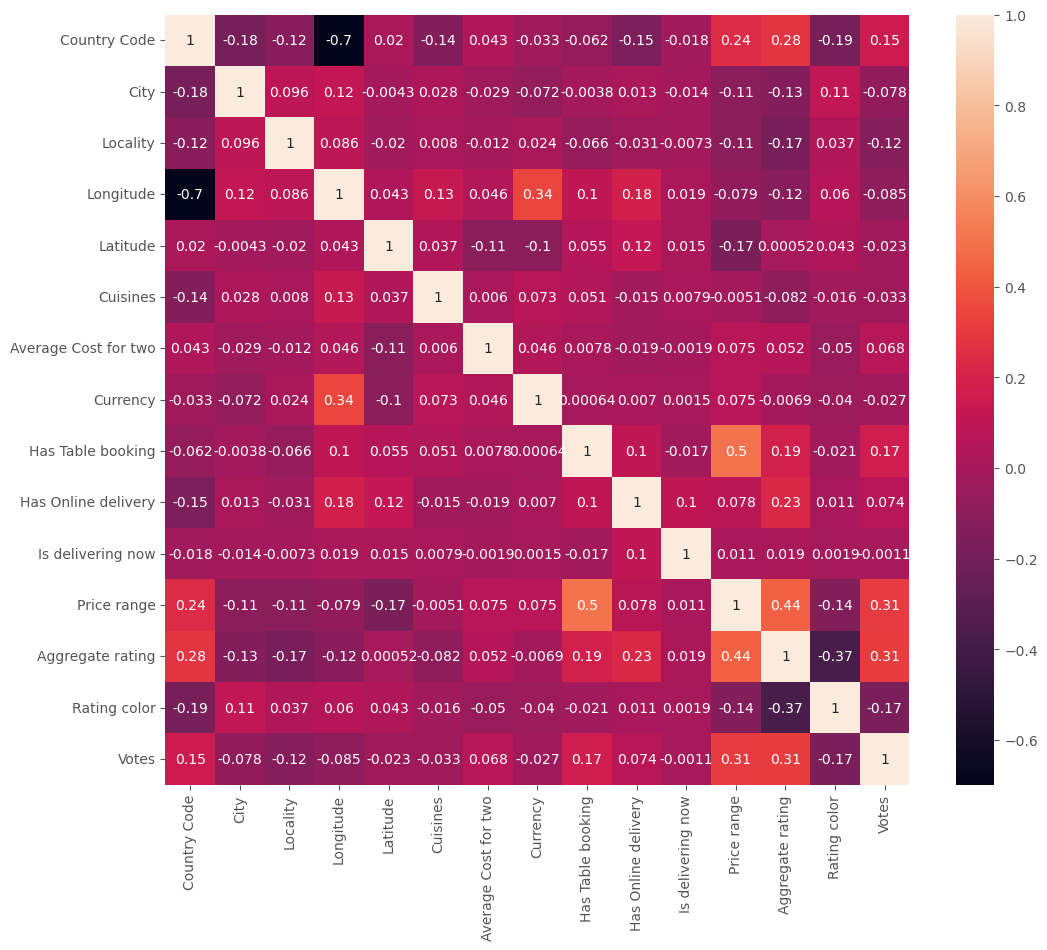

In [234]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(),annot=True)

In [235]:
#Normalising the X dataframe as there are values out of range.

scaler=MinMaxScaler()

In [236]:
X_scaled = scaler.fit_transform(X)

In [237]:
X_scaled.shape

(9551, 15)

In [238]:
# Not necessary in case of unsupervised training but just a step to show

# X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# Using the K-Means Algorithm

In [239]:
from sklearn.cluster import KMeans

In [240]:
# If we take the no of clusters as k=2

model= KMeans(n_clusters=2,random_state=42,init='k-means++',max_iter=100)
model.fit(X)
model.inertia_

694234921331.1849

In [241]:
# If we take the no of clusters as k=3

model= KMeans(n_clusters=3,random_state=42,init='k-means++',max_iter=100)
model.fit(X)
model.inertia_

192024356638.82852

In [242]:
# If we take the no of clusters as k=4

model= KMeans(n_clusters=4,random_state=42,init='k-means++',max_iter=100)
model.fit(X)
model.inertia_

76286748615.70148

In [243]:
#So here we will take a range of values for no. of clusters and then we will check the inertia of the following

loss=[]

for i in range (1,10):
    model= KMeans(n_clusters=i,random_state=42,init='k-means++',max_iter=100)
    model.fit(X)
    loss.append(model.inertia_)
    print('Loss of the model is:',loss)

Loss of the model is: [2487276078002.739]
Loss of the model is: [2487276078002.739, 694234921331.1849]
Loss of the model is: [2487276078002.739, 694234921331.1849, 192024356638.82852]
Loss of the model is: [2487276078002.739, 694234921331.1849, 192024356638.82852, 76286748615.70148]
Loss of the model is: [2487276078002.739, 694234921331.1849, 192024356638.82852, 76286748615.70148, 39827287930.24994]
Loss of the model is: [2487276078002.739, 694234921331.1849, 192024356638.82852, 76286748615.70148, 39827287930.24994, 21090370945.64832]
Loss of the model is: [2487276078002.739, 694234921331.1849, 192024356638.82852, 76286748615.70148, 39827287930.24994, 21090370945.64832, 15755726495.444237]
Loss of the model is: [2487276078002.739, 694234921331.1849, 192024356638.82852, 76286748615.70148, 39827287930.24994, 21090370945.64832, 15755726495.444237, 13044398571.949745]
Loss of the model is: [2487276078002.739, 694234921331.1849, 192024356638.82852, 76286748615.70148, 39827287930.24994, 2109

Text(0.5, 1.0, 'Elbow Method')

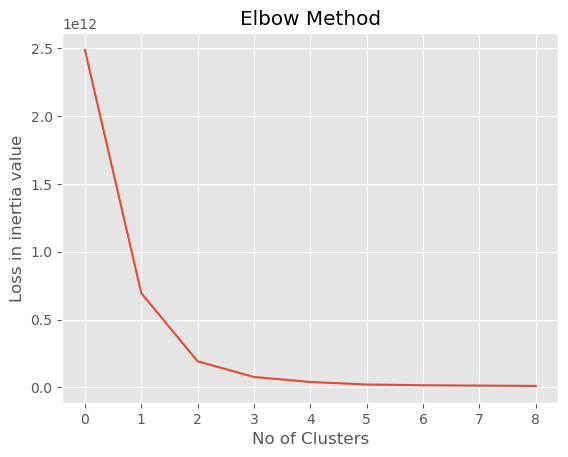

In [244]:
# Now we will try to plot by  WCSS method  or Elbow Method the graph of the loss 

plt.plot(loss)
plt.xlabel('No of Clusters')
plt.ylabel('Loss in inertia value')
plt.title('Elbow Method')

In [245]:
# Checking the no of classes present in the dependent label.

df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [246]:
# From the above graph we clearly see that the no of classes wold be 5 or 6 so we will try to check these classes and plot classes with their centroids.
# Lets take the value of k=5

In [247]:
model= KMeans(n_clusters=6,random_state=42,init='k-means++',max_iter=100)
model.fit(X)
model.inertia_

21090370945.64832

In [248]:
#The classes generated by model after training
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5])

In [249]:
# Checking the Centroid values for each classes.

C=model.cluster_centers_
C[0]

array([1.81989507e+01, 7.83433368e+01, 6.58302623e+02, 6.40436527e+01,
       2.59245321e+01, 9.88214586e+02, 5.82231060e+02, 3.97544596e+00,
       1.21511018e-01, 2.57187828e-01, 3.56768101e-03, 1.80230850e+00,
       2.66278069e+00, 2.95655824e+00, 1.55554145e+02])

In [250]:
X.head(2)

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Votes
0,162,73,171,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,314
1,162,73,593,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,591


<Axes: xlabel='Average Cost for two', ylabel='Votes'>

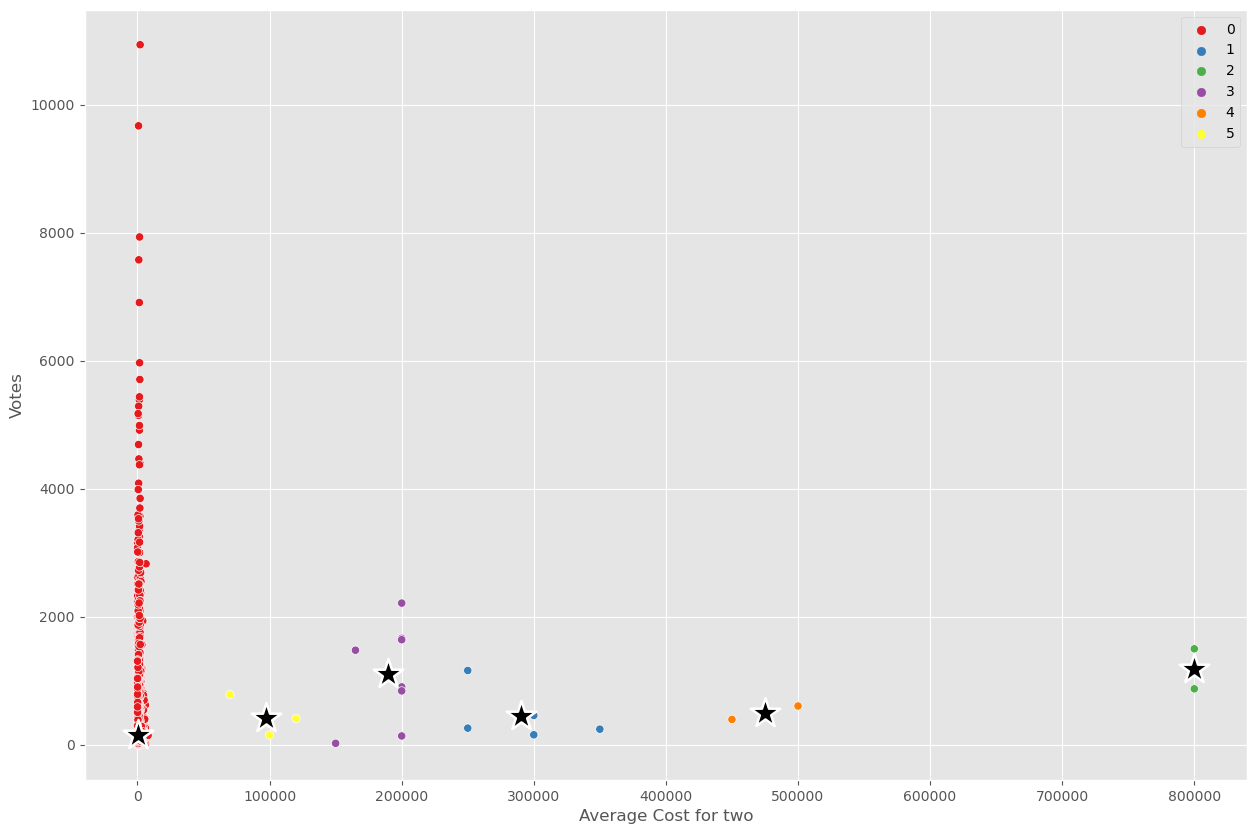

In [251]:
# Plotting the clusters with their centroids


fig,axes=plt.subplots(figsize=(15,10))

sns.scatterplot(x='Average Cost for two',y= 'Votes',data=X ,hue=model.labels_,palette='Set1')
sns.scatterplot(x= C[:,6],y= C[:,14],marker='*',s=500,color='Black')

# DBSCAN Algorithm

In [252]:
from sklearn.cluster import DBSCAN

In [253]:
model2=DBSCAN(eps= 0.5,  min_samples= 5)
model2.fit(X)
np.unique(model2.labels_)

array([-1,  0,  1], dtype=int64)

In [254]:
model3=DBSCAN(eps=0.98,  min_samples=3)
model3.fit(X)
np.unique(model3.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [255]:
# So by random changing the values of hyperparametere we will try to obtain the optimal no of clusters in DB Scan method.
#Let us consider that there are best of 6 classses obtained by training

model1=DBSCAN(eps=2.002,  min_samples= 4)
model1.fit(X)
np.unique(model1.labels_)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

<Axes: >

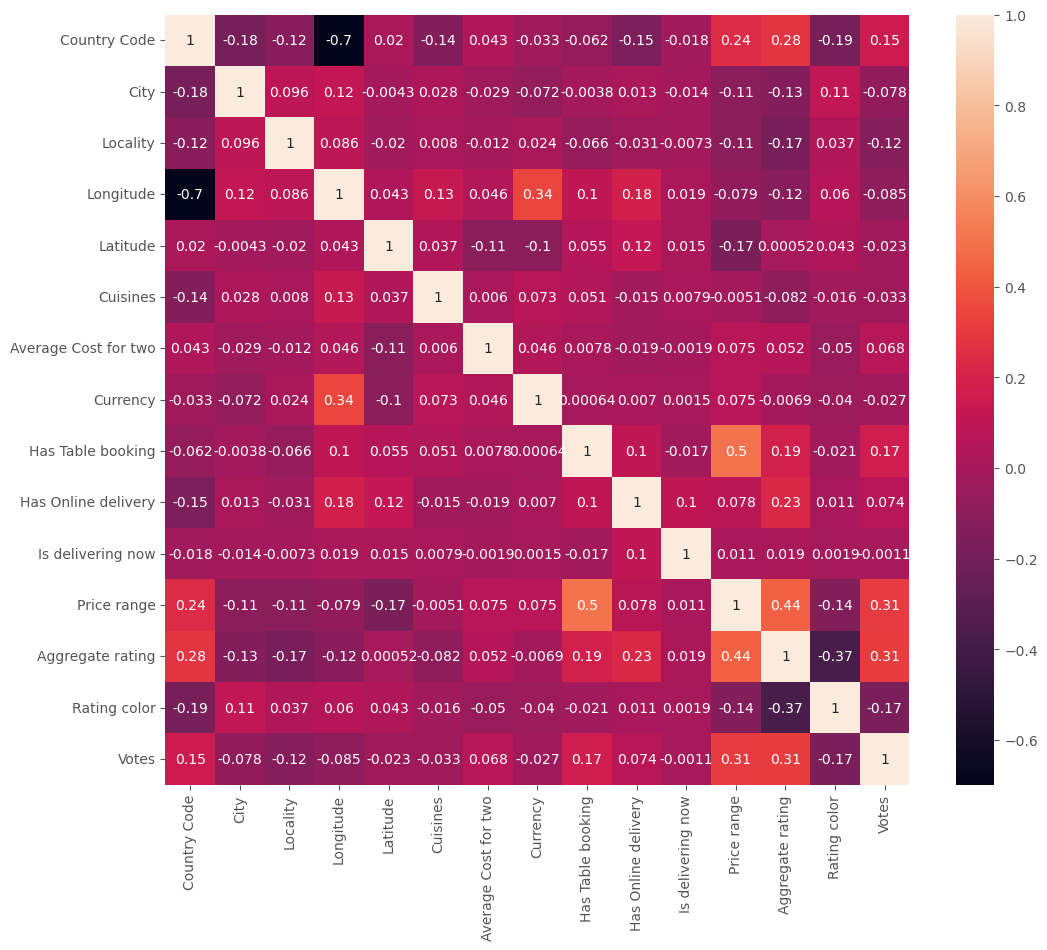

In [256]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(),annot=True)

In [258]:
X.columns

Index(['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Votes'],
      dtype='object')

<Axes: xlabel='Average Cost for two', ylabel='Votes'>

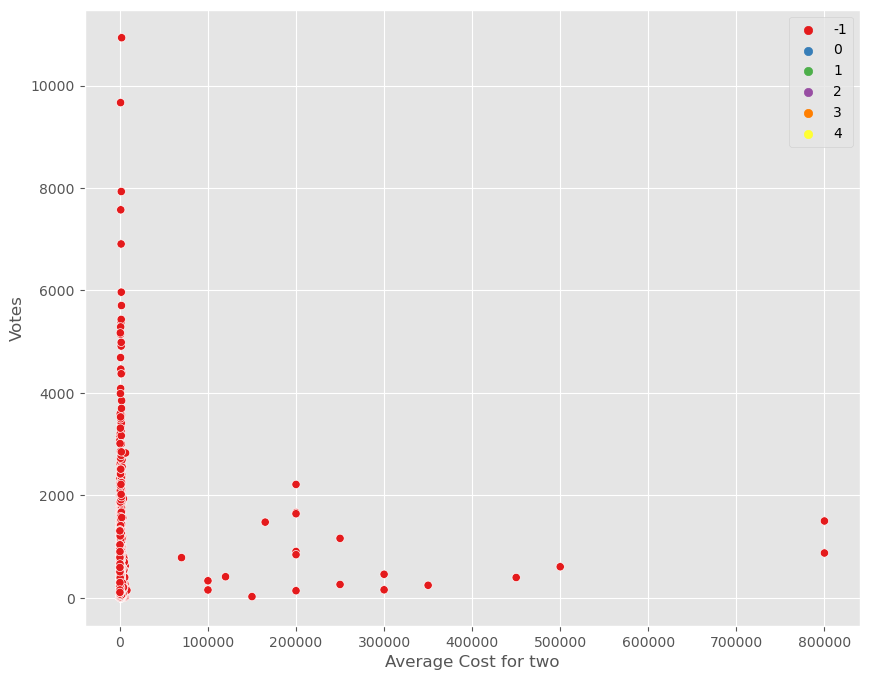

In [271]:
# We will try to plot these clusters 
plt.figure(figsize=(10,8))
sns.scatterplot(x='Average Cost for two',y= 'Votes',data=X ,hue=model1.labels_,palette='Set1')
